In [1]:
import script_test as sr

In [2]:
HEIGHT, WIDTH, CHANNEL = 512, 512, 3
#X_train - >BGR2HSV
X_train = sr.imagePrep('data/train/*', WIDTH, HEIGHT, CHANNEL)
X_test = sr.imagePrep('data/test/*', WIDTH, HEIGHT, CHANNEL)

#Y_train -> BGR2GRAY 
Y_train = sr.imagePrep('data/target/*', WIDTH, HEIGHT, 1)

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)
print(Y_train.shape, Y_train.dtype)

(86, 512, 512, 3) float32
(12, 512, 512, 3) float32
(86, 512, 512, 3) float32


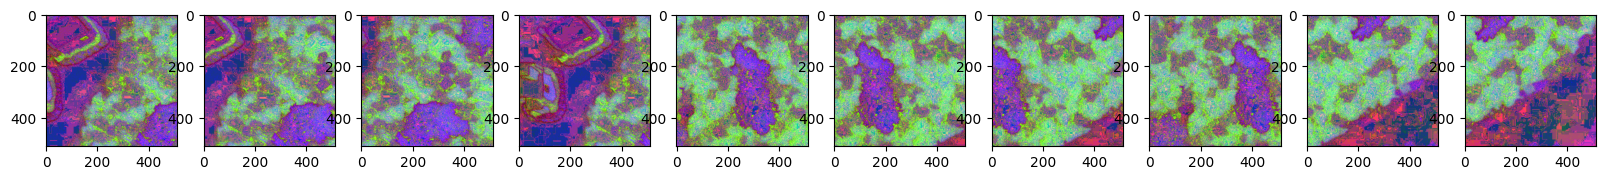

In [3]:
fig = sr.imageVis(X_train ,WIDTH, HEIGHT,CHANNEL)

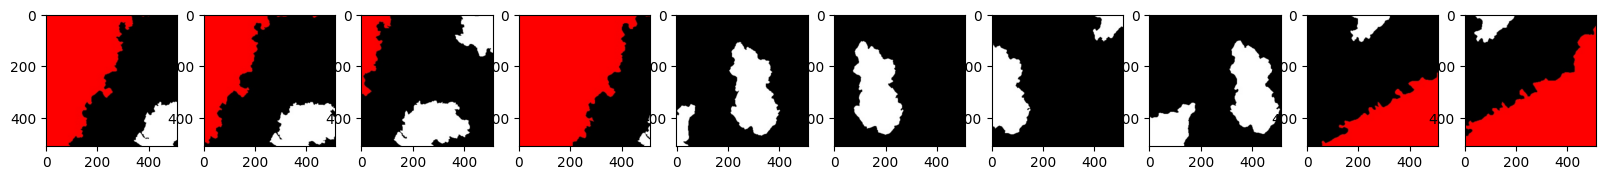

In [4]:
fig = sr.imageVis(Y_train ,WIDTH, HEIGHT,3)

In [5]:
#결과 값이 GRAY img
model = sr.get_model((WIDTH, HEIGHT),3)

In [13]:
model.summary()

In [7]:
# #모델 학습부분

# #모델 저장 폴더 설정
# import tensorflow as tf
# import os

# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

# tf.debugging.set_log_device_placement(False)

# with tf.device('/CPU:0'):
#     #모델 저장 조건 설정
#     from tensorflow.keras.callbacks import ModelCheckpoint
#     modelpath = './model/{epoch:02d}-{accuracy:.4f}.hdf5'

#     #모델 업데이트 및 저장
#     checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'accuracy', 
#                                   verbose = 1, save_best_only = False)

#     model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=['accuracy'])
#     model.fit(X_train, Y_train, epochs=800, batch_size=2, validation_data=(X_train, Y_train), callbacks = [checkpointer])

In [8]:
# #GPU_limit
# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0], 
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

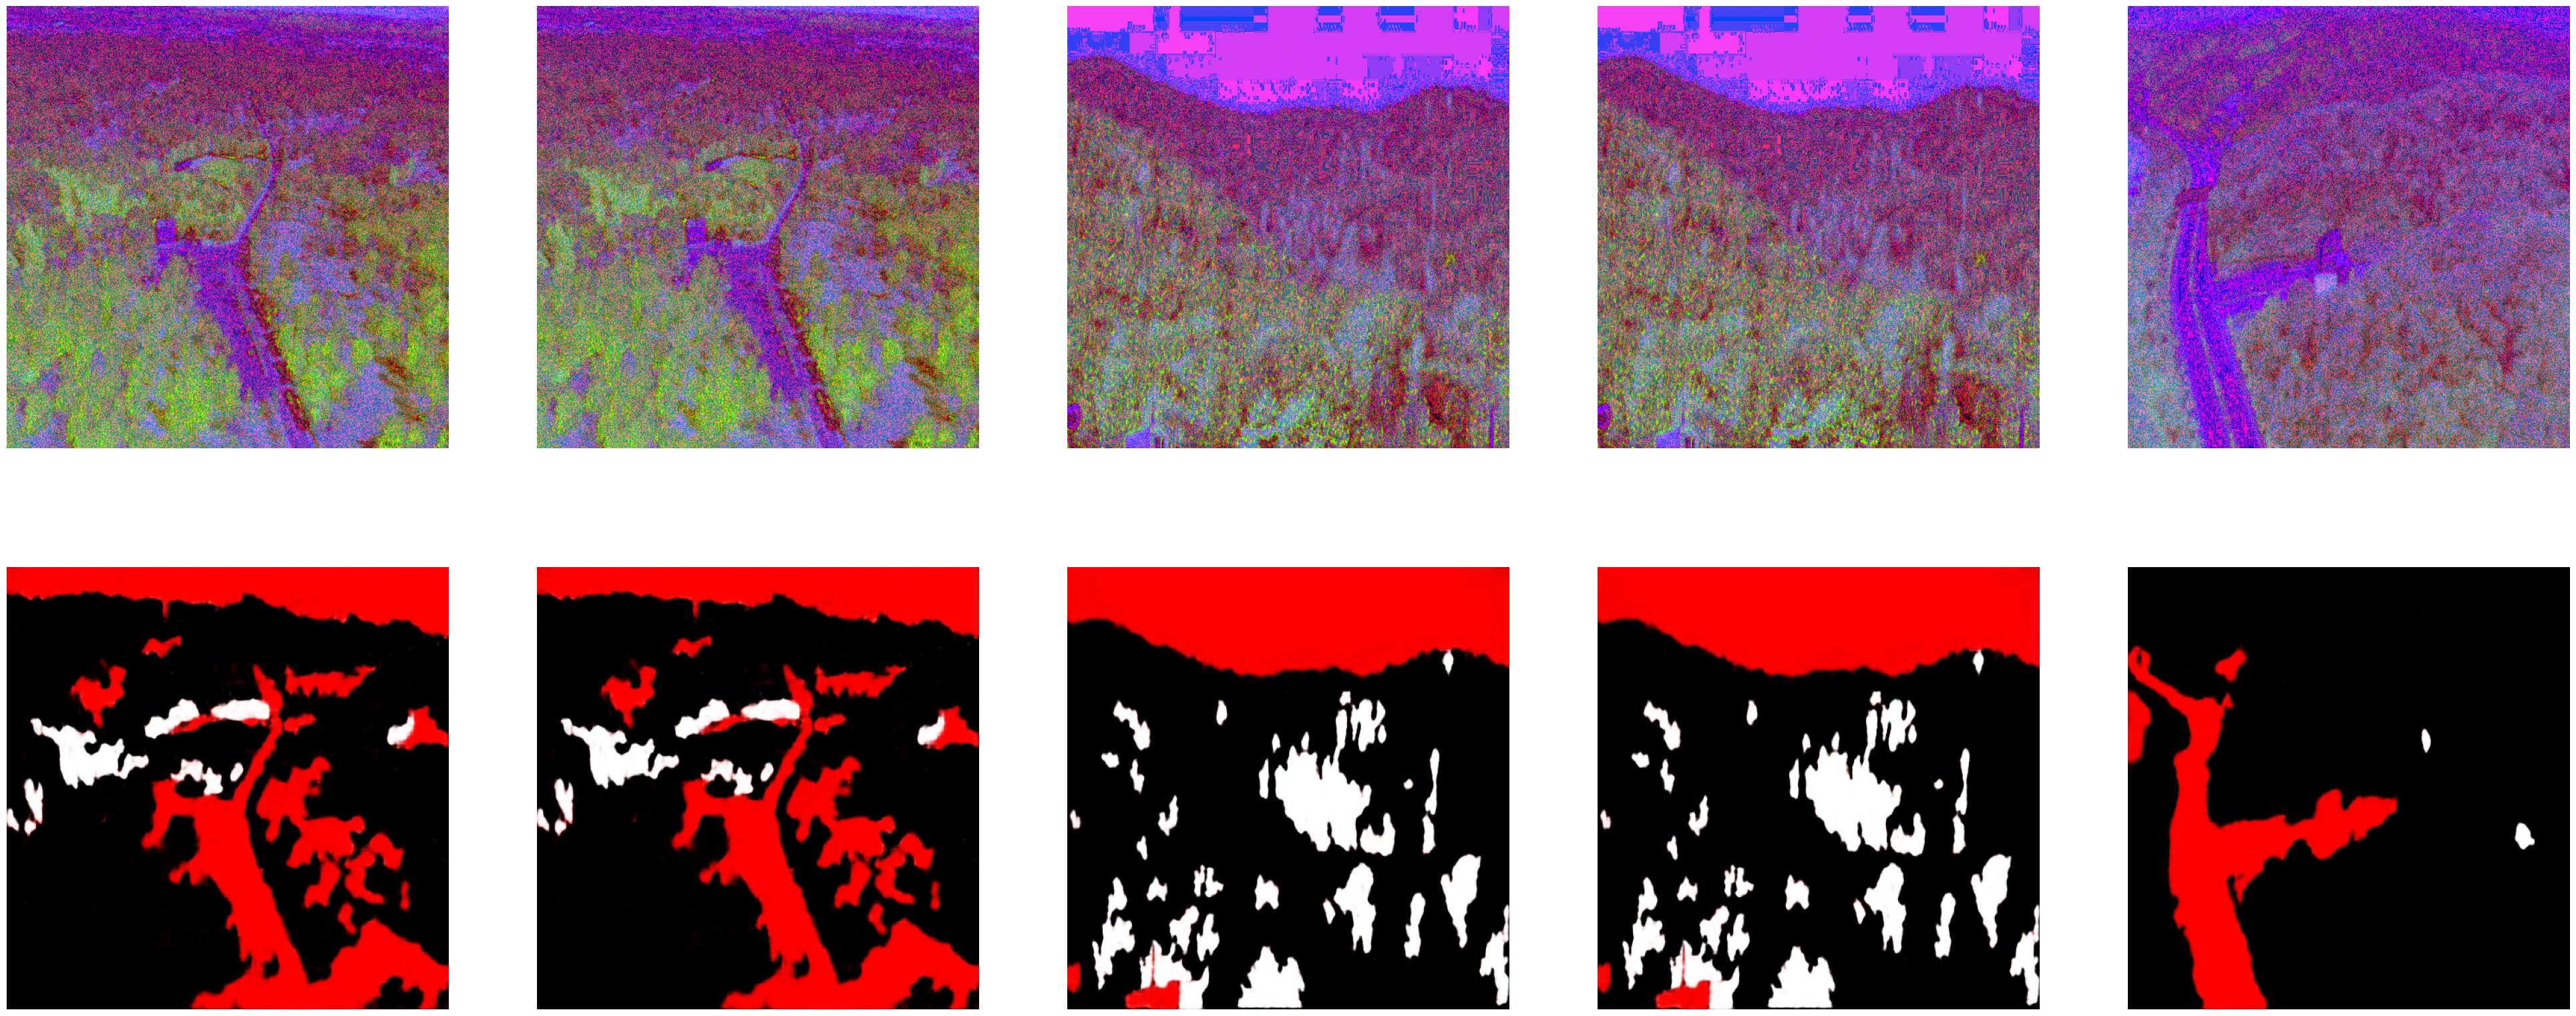

In [6]:
#학습할 모델 지정.
#CPU 사용
import tensorflow as tf

tf.debugging.set_log_device_placement(False)

with tf.device('/CPU:0'):
    model_path= './model/512_0911_530/test (528).hdf5'#모델 경로 설정
    load_model = sr.test_model(model_path, X_test)

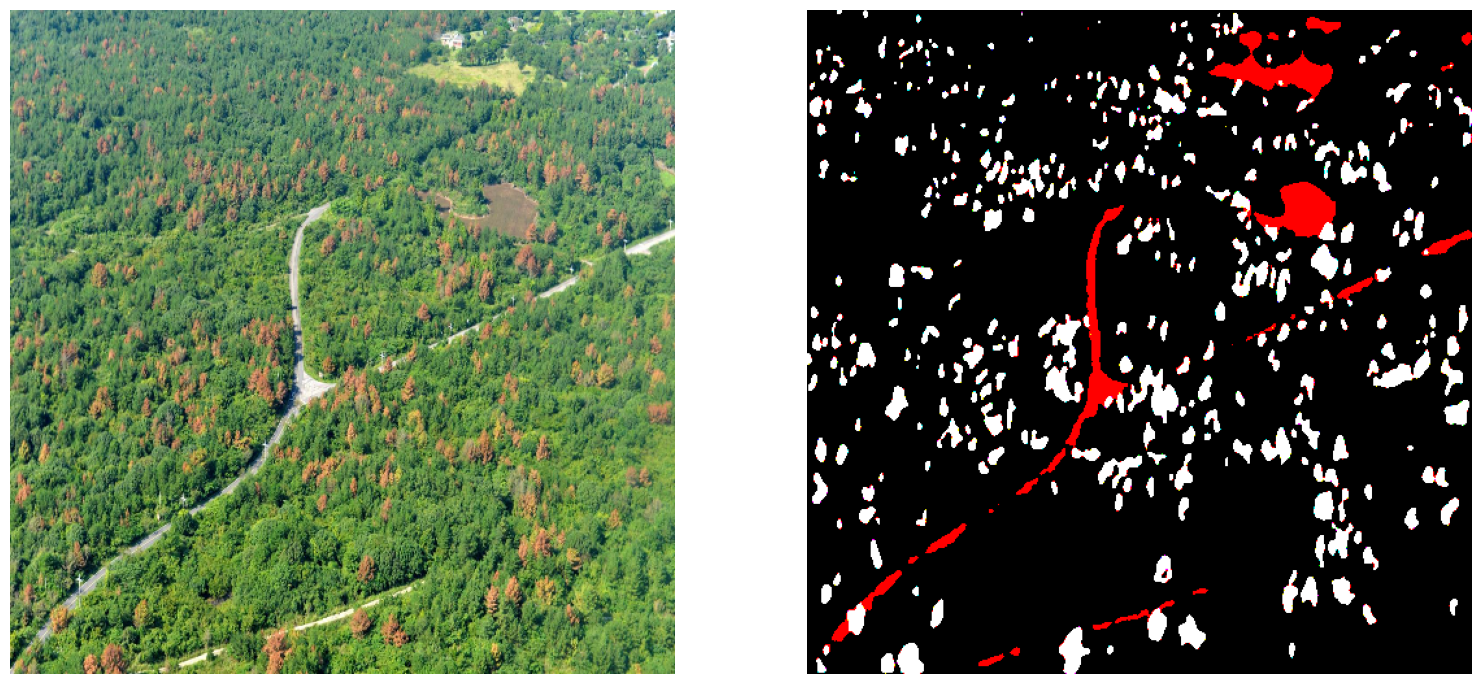

In [7]:
#입력모델, 이미지순서, 훈련데이터
img= sr.display_mask_test(load_model,0,X_test)

In [18]:
#img= sr.display_mask(load_model,12)